# Project 1 

# Data retrival and Storing
### Using ALPHA VANTAGE API

### Stocks Apple, Microsoft and Tesla

In [4]:
import requests
import json
from datetime import datetime

# Replace 'YOUR_API_KEY' with your actual Alpha Vantage API key
api_key = 'A7XLMMXWDS57GYAH'

# List of stock symbols
symbols = ['AAPL', 'TSLA', 'MSFT']

# Function to get stock data
def get_stock_data(symbol):
    base_url = f'https://www.alphavantage.co/query'
    function = 'TIME_SERIES_DAILY'
    datatype = 'json'

    # Make API request
    response = requests.get(
        f'{base_url}?function={function}&symbol={symbol}&apikey={api_key}&datatype={datatype}'
    )

    # Parse JSON response
    data = response.json()

    # Extract relevant information
    stock_data = []
    for date, values in data['Time Series (Daily)'].items():
        stock_info = {
            'symbol': symbol,
            'date': date,
            'open': float(values['1. open']),
            'high': float(values['2. high']),
            'low': float(values['3. low']),
            'close': float(values['4. close']),
            'volume': int(values['5. volume']),
        }
        stock_data.append(stock_info)

    return stock_data

# Get stock data for each symbol
all_stock_data = []
for symbol in symbols:
    stock_data = get_stock_data(symbol)
    all_stock_data.extend(stock_data)

# Print the extracted information
for stock_info in all_stock_data:
    stock_info['date'] = datetime.strptime(stock_info['date'], '%Y-%m-%d').date()
    print(stock_info)


{'symbol': 'AAPL', 'date': datetime.date(2023, 11, 29), 'open': 190.9, 'high': 192.09, 'low': 188.97, 'close': 189.37, 'volume': 37939466}
{'symbol': 'AAPL', 'date': datetime.date(2023, 11, 28), 'open': 189.78, 'high': 191.08, 'low': 189.4, 'close': 190.4, 'volume': 38415419}
{'symbol': 'AAPL', 'date': datetime.date(2023, 11, 27), 'open': 189.92, 'high': 190.67, 'low': 188.9, 'close': 189.79, 'volume': 40552609}
{'symbol': 'AAPL', 'date': datetime.date(2023, 11, 24), 'open': 190.87, 'high': 190.9, 'low': 189.25, 'close': 189.97, 'volume': 24048344}
{'symbol': 'AAPL', 'date': datetime.date(2023, 11, 22), 'open': 191.49, 'high': 192.93, 'low': 190.825, 'close': 191.31, 'volume': 39630011}
{'symbol': 'AAPL', 'date': datetime.date(2023, 11, 21), 'open': 191.41, 'high': 191.52, 'low': 189.74, 'close': 190.64, 'volume': 38134485}
{'symbol': 'AAPL', 'date': datetime.date(2023, 11, 20), 'open': 189.89, 'high': 191.905, 'low': 189.88, 'close': 191.45, 'volume': 46538614}
{'symbol': 'AAPL', 'dat

### Inserting it into Mysql Database 

In [6]:
import requests
import json
import mysql.connector

# Your API key and stock symbols
api_key = "A7XLMMXWDS57GYAH"
symbols = ["AAPL", "TSLA", "MSFT"]
base_url = "https://www.alphavantage.co/query"

# MySQL database connection details
db_config = {
    'host': 'localhost',
    'user': 'root',
    'password': 'Duke#7539',
    'database': 'Project1'
}

# Establish a connection to MySQL
conn = mysql.connector.connect(**db_config)
cursor = conn.cursor()

# Create the 'stocks' table if it doesn't exist
cursor.execute("""
    CREATE TABLE IF NOT EXISTS stocks (
        id INT AUTO_INCREMENT PRIMARY KEY,
        symbol VARCHAR(10),
        date DATE,
        open FLOAT,
        high FLOAT,
        low FLOAT,
        close FLOAT,
        volume BIGINT
    )
""")

# Iterate through symbols and retrieve data
for symbol in symbols:
    params = {
        "function": "TIME_SERIES_DAILY",
        "symbol": symbol,
        "apikey": api_key
    }

    response = requests.get(base_url, params=params)
    if response.status_code == 200:
        data = response.json()
        time_series_data = data.get("Time Series (Daily)")

        for date, values in time_series_data.items():
            stock_date = date
            stock_open = values["1. open"]
            stock_high = values["2. high"]
            stock_low = values["3. low"]
            stock_close = values["4. close"]
            stock_volume = values["5. volume"]

            # SQL query to insert data into the 'stocks' table
            sql = "INSERT INTO stocks (symbol, date, open, high, low, close, volume) VALUES (%s, %s, %s, %s, %s, %s, %s)"
            val = (symbol, stock_date, stock_open, stock_high, stock_low, stock_close, stock_volume)

            # Execute the SQL query
            cursor.execute(sql, val)

            # Commit the changes to the database
            conn.commit()

    else:
        print(f"Failed to fetch data for {symbol}. Error {response.status_code}")

# Close the cursor and database connection
cursor.close()
conn.close()


### New Stocks IBM, Google and Nvidia and storing it in my database

In [10]:
import requests
import mysql.connector

api_key = "A7XLMMXWDS57GYAH"
symbols = ["GOOGL", "IBM", "NVDA"]
base_url = "https://www.alphavantage.co/query"

# MySQL database connection details
db_config = {
    'host': 'localhost',
    'user': 'root',
    'password': 'Duke#7539',
    'database': 'Project1'
}

# Establish a connection to MySQL
conn = mysql.connector.connect(**db_config)
cursor = conn.cursor()

# Create the 'newstocks' table if it doesn't exist
cursor.execute("""
    CREATE TABLE IF NOT EXISTS newstocks (
        id INT AUTO_INCREMENT PRIMARY KEY,
        symbol VARCHAR(10),
        date DATE,
        open FLOAT,
        high FLOAT,
        low FLOAT,
        close FLOAT,
        volume BIGINT
    )
""")

# Iterate through symbols and retrieve data
insert_success = False  # Flag to check if insertion is successful

for symbol in symbols:
    params = {
        "function": "TIME_SERIES_DAILY",
        "symbol": symbol,
        "apikey": api_key
    }

    response = requests.get(base_url, params=params)
    if response.status_code == 200:
        data = response.json()
        time_series_data = data.get("Time Series (Daily)")

        for date, values in time_series_data.items():
            stock_date = date
            stock_open = values["1. open"]
            stock_high = values["2. high"]
            stock_low = values["3. low"]
            stock_close = values["4. close"]
            stock_volume = values["5. volume"]

            # SQL query to insert data into the 'newstocks' table
            sql = "INSERT INTO newstocks (symbol, date, open, high, low, close, volume) VALUES (%s, %s, %s, %s, %s, %s, %s)"
            val = (symbol, stock_date, stock_open, stock_high, stock_low, stock_close, stock_volume)

            # Execute the SQL query
            cursor.execute(sql, val)

            # Commit the changes to the database
            conn.commit()

        insert_success = True  # Set flag to True if data insertion is successful
    else:
        print(f"Failed to fetch data for {symbol}. Error {response.status_code}")

# Close the cursor and database connection
cursor.close()
conn.close()

if insert_success:
    print("Data stored successfully")


Data stored successfully


# Visualizations

### Stocks Open and Close values comparison

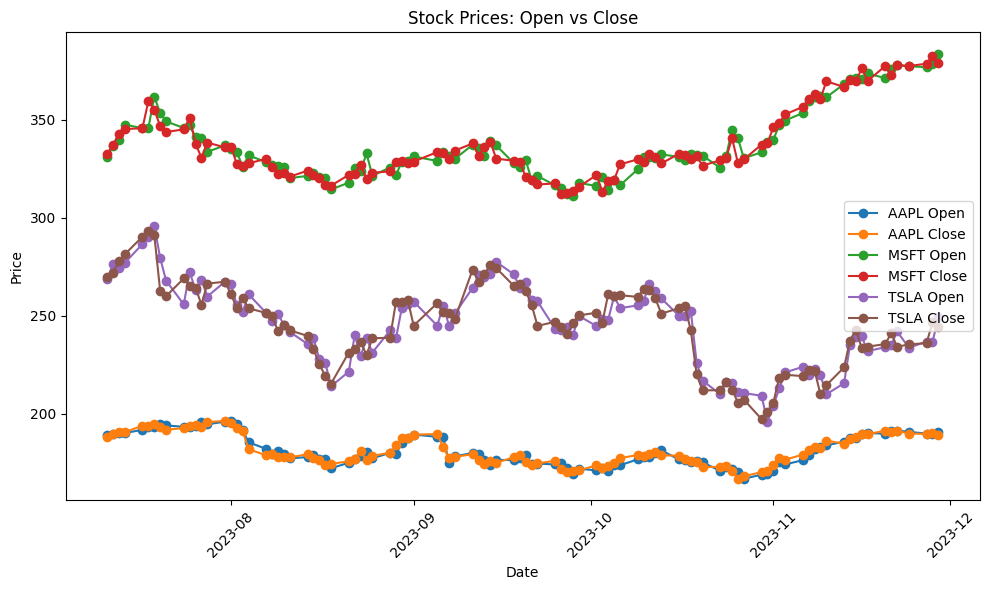

In [11]:
import mysql.connector
import matplotlib.pyplot as plt

# MySQL database connection details
db_config = {
    'host': 'localhost',
    'user': 'root',
    'password': 'Duke#7539',
    'database': 'Project1'
}

# Establish a connection to MySQL
conn = mysql.connector.connect(**db_config)
cursor = conn.cursor()

# Fetch data from the 'stocks' table for Apple, Microsoft, and Tesla
symbols = ['AAPL', 'MSFT', 'TSLA']
data = {}

for symbol in symbols:
    query = f"SELECT date, open, close FROM stocks WHERE symbol = '{symbol}'"
    cursor.execute(query)
    result = cursor.fetchall()
    data[symbol] = {'date': [], 'open': [], 'close': []}
    for row in result:
        data[symbol]['date'].append(row[0])
        data[symbol]['open'].append(row[1])
        data[symbol]['close'].append(row[2])

# Close the cursor and database connection
cursor.close()
conn.close()

# Plotting the data
plt.figure(figsize=(10, 6))

for symbol in symbols:
    plt.plot(data[symbol]['date'], data[symbol]['open'], label=f'{symbol} Open', linestyle='-', marker='o')
    plt.plot(data[symbol]['date'], data[symbol]['close'], label=f'{symbol} Close', linestyle='-', marker='o')

plt.title('Stock Prices: Open vs Close')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Maximum value of the volume of the stocks

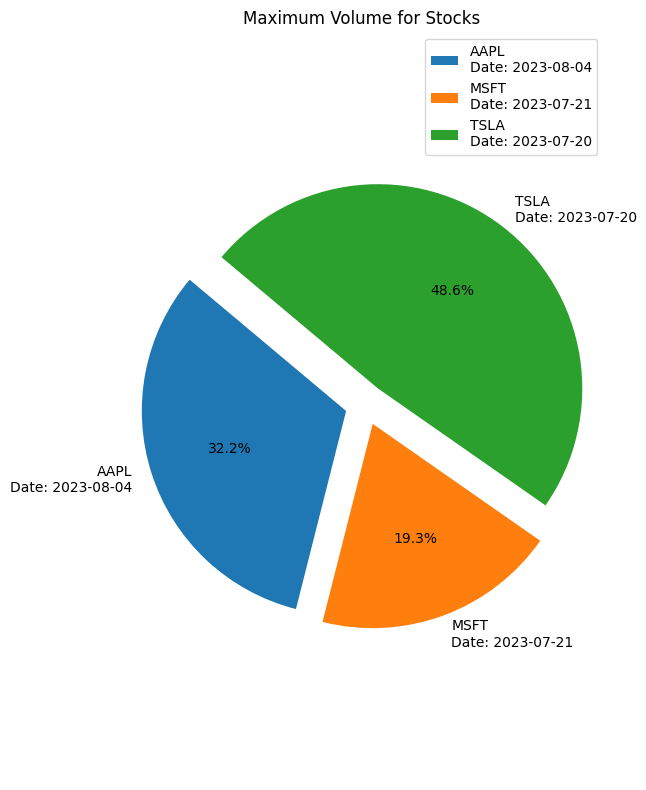

In [14]:
import mysql.connector
import matplotlib.pyplot as plt

# MySQL database connection details
db_config = {
    'host': 'localhost',
    'user': 'root',
    'password': 'Duke#7539',
    'database': 'Project1'
}

# Establish a connection to MySQL
conn = mysql.connector.connect(**db_config)
cursor = conn.cursor()

# Fetch data for maximum volume and corresponding date for each stock
symbols = ['AAPL', 'MSFT', 'TSLA']
max_volume_data = {}

for symbol in symbols:
    query = f"SELECT date, volume FROM stocks WHERE symbol = '{symbol}' ORDER BY volume DESC LIMIT 1"
    cursor.execute(query)
    result = cursor.fetchone()

    if result:
        max_volume_data[symbol] = {'date': result[0], 'volume': result[1]}

# Close the cursor and database connection
cursor.close()
conn.close()

# Plotting the data as a pie chart
labels = [f"{symbol}\nDate: {max_volume_data[symbol]['date']}" for symbol in max_volume_data]
sizes = [max_volume_data[symbol]['volume'] for symbol in max_volume_data]
explode = (0.1, 0.1, 0.1)  # To explode the slices

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Maximum Volume for Stocks')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.legend(loc="best", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


### Comparison of the High Value of all stocks 


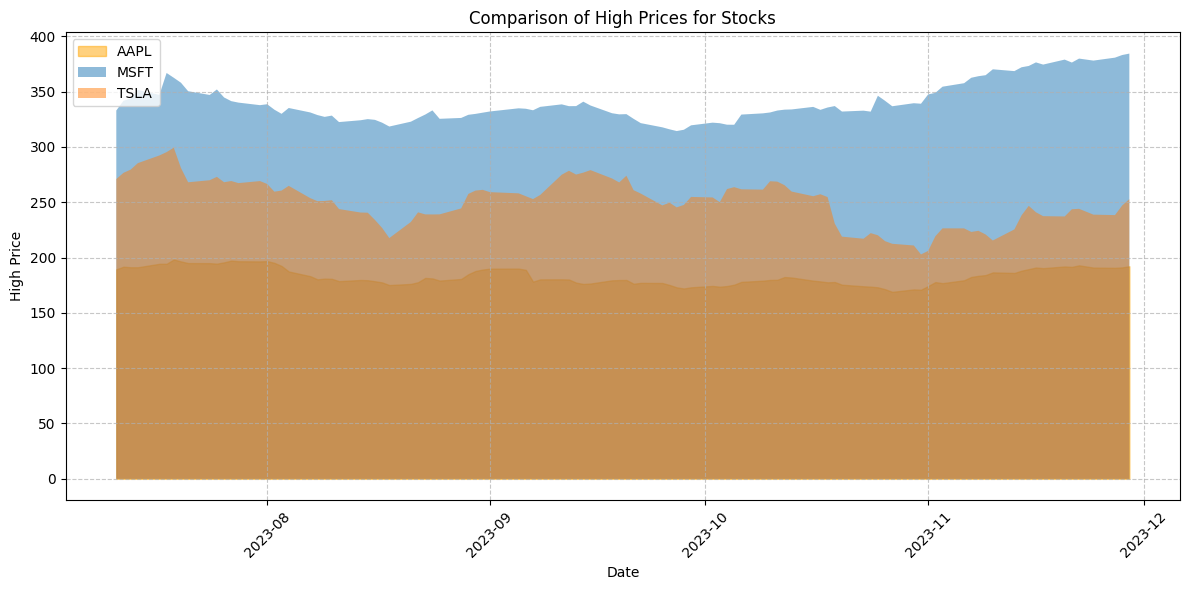

In [16]:
import mysql.connector
import matplotlib.pyplot as plt

# MySQL database connection details
db_config = {
    'host': 'localhost',
    'user': 'root',
    'password': 'Duke#7539',
    'database': 'Project1'
}

# Establish a connection to MySQL
conn = mysql.connector.connect(**db_config)
cursor = conn.cursor()

# Fetch high values for Apple, Microsoft, and Tesla
symbols = ['AAPL', 'MSFT', 'TSLA']
data = {}

for symbol in symbols:
    query = f"SELECT date, high FROM stocks WHERE symbol = '{symbol}'"
    cursor.execute(query)
    result = cursor.fetchall()
    data[symbol] = {'date': [], 'high': []}
    for row in result:
        data[symbol]['date'].append(row[0])
        data[symbol]['high'].append(row[1])

# Close the cursor and database connection
cursor.close()
conn.close()

# Plotting the data as an area chart
plt.figure(figsize=(12, 6))

for symbol in symbols:
    if symbol == 'AAPL':
        plt.fill_between(data[symbol]['date'], data[symbol]['high'], label=symbol, alpha=0.5, color='orange')
    else:
        plt.fill_between(data[symbol]['date'], data[symbol]['high'], label=symbol, alpha=0.5)

plt.title('Comparison of High Prices for Stocks')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Comparison of Low values of the stocks

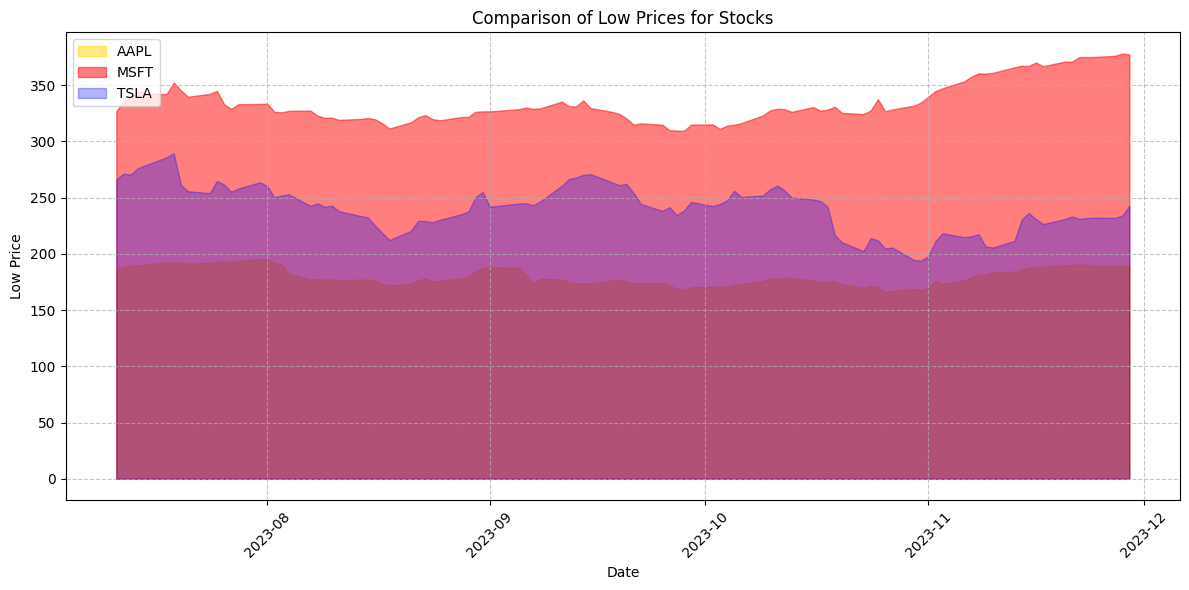

In [23]:
import mysql.connector
import matplotlib.pyplot as plt

# MySQL database connection details
db_config = {
    'host': 'localhost',
    'user': 'root',
    'password': 'Duke#7539',
    'database': 'Project1'
}

# Establish a connection to MySQL
conn = mysql.connector.connect(**db_config)
cursor = conn.cursor()

# Fetch low values for Apple, Microsoft, and Tesla
symbols = ['AAPL', 'MSFT', 'TSLA']
data = {}

for symbol in symbols:
    query = f"SELECT date, low FROM stocks WHERE symbol = '{symbol}'"
    cursor.execute(query)
    result = cursor.fetchall()
    data[symbol] = {'date': [], 'low': []}
    for row in result:
        data[symbol]['date'].append(row[0])
        data[symbol]['low'].append(row[1])

# Close the cursor and database connection
cursor.close()
conn.close()

# Plotting the data as an area chart
plt.figure(figsize=(12, 6))

for symbol in symbols:
    if symbol == 'AAPL':
        plt.fill_between(data[symbol]['date'], data[symbol]['low'], label=symbol, alpha=0.5, color='gold')
    elif symbol == 'MSFT':
        plt.fill_between(data[symbol]['date'], data[symbol]['low'], label=symbol, alpha=0.5, color='red')
    elif symbol == 'TSLA':
        plt.fill_between(data[symbol]['date'], data[symbol]['low'], label=symbol, alpha=0.3, color='blue')

plt.title('Comparison of Low Prices for Stocks')
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Displaying the rows in the stocks table 

In [26]:
import mysql.connector
import pandas as pd

# MySQL database connection details
db_config = {
    'host': 'localhost',
    'user': 'root',
    'password': 'Duke#7539',
    'database': 'Project1'
}

# Establish a connection to MySQL
conn = mysql.connector.connect(**db_config)
cursor = conn.cursor()

# Fetch all rows from the stocks table
query = "SELECT * FROM stocks"
cursor.execute(query)
rows = cursor.fetchall()

# Get column names
columns = [desc[0] for desc in cursor.description]

# Close the cursor and database connection
cursor.close()
conn.close()

# Create a Pandas DataFrame for displaying the data
df = pd.DataFrame(rows, columns=columns)

# Display the DataFrame
print(df)


      id symbol        date     open     high      low   close    volume
0      1   AAPL  2023-11-29  190.900  192.090  188.970  189.37  37939466
1      2   AAPL  2023-11-28  189.780  191.080  189.400  190.40  38415419
2      3   AAPL  2023-11-27  189.920  190.670  188.900  189.79  40552609
3      4   AAPL  2023-11-24  190.870  190.900  189.250  189.97  24048344
4      5   AAPL  2023-11-22  191.490  192.930  190.825  191.31  39630011
..   ...    ...         ...      ...      ...      ...     ...       ...
295  296   MSFT  2023-07-17  345.678  346.990  342.200  345.73  20363927
296  297   MSFT  2023-07-14  347.590  351.430  344.310  345.24  28352729
297  298   MSFT  2023-07-13  339.560  343.740  339.020  342.66  20567159
298  299   MSFT  2023-07-12  336.600  341.652  335.670  337.20  29995262
299  300   MSFT  2023-07-11  331.060  332.860  327.000  332.47  26698218

[300 rows x 8 columns]


### New stocks table 

In [28]:
import pandas as pd
from sqlalchemy import create_engine

# MySQL database connection details
db_config = {
    'host': 'localhost',
    'user': 'root',
    'password': 'Duke#7539',
    'database': 'Project1'
}

# Create a SQLAlchemy engine
engine = create_engine(f"mysql+mysqlconnector://{db_config['user']}:{db_config['password']}@{db_config['host']}/{db_config['database']}")

# Fetching data from the 'newstocks' table using Pandas and SQLAlchemy engine
query = "SELECT * FROM newstocks"
df = pd.read_sql(query, engine)

# Display the DataFrame
print(df)


      id symbol        date     open     high      low   close    volume
0      1  GOOGL  2023-11-29  137.570  138.288  134.840  134.99  23839136
1      2  GOOGL  2023-11-28  136.080  137.250  135.422  137.20  18730032
2      3  GOOGL  2023-11-27  136.030  138.420  136.000  136.41  23436526
3      4  GOOGL  2023-11-24  138.030  138.130  135.990  136.69  12514322
4      5  GOOGL  2023-11-22  137.470  139.420  137.470  138.49  17820456
..   ...    ...         ...      ...      ...      ...     ...       ...
295  296   NVDA  2023-07-17  462.890  464.960  452.624  464.61  51048822
296  297   NVDA  2023-07-14  465.828  480.880  450.600  454.69  77207533
297  298   NVDA  2023-07-13  445.180  461.550  444.920  459.77  47820369
298  299   NVDA  2023-07-12  430.330  439.350  427.773  439.02  48127702
299  300   NVDA  2023-07-11  424.810  427.580  420.670  424.05  29824406

[300 rows x 8 columns]


# New Stocks Tabe Visualization 

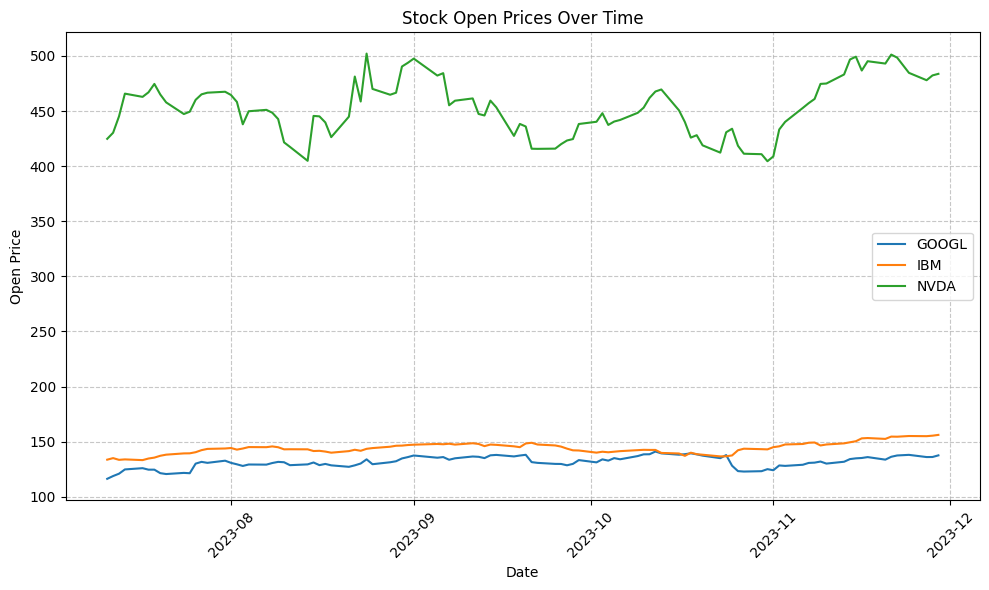

In [29]:
import mysql.connector
import matplotlib.pyplot as plt

# MySQL database connection details
db_config = {
    'host': 'localhost',
    'user': 'root',
    'password': 'Duke#7539',
    'database': 'Project1'
}

# Establish a connection to MySQL
conn = mysql.connector.connect(**db_config)
cursor = conn.cursor()

# Fetching data from the 'newstocks' table
symbols = ['GOOGL', 'IBM', 'NVDA']  # Assuming the symbols are GOOGL for Google, IBM, and NVDA for Nvidia
data = {}

for symbol in symbols:
    query = f"SELECT date, open FROM newstocks WHERE symbol = '{symbol}'"
    cursor.execute(query)
    result = cursor.fetchall()
    data[symbol] = {'date': [], 'open': []}
    for row in result:
        data[symbol]['date'].append(row[0])
        data[symbol]['open'].append(row[1])

# Close the cursor and database connection
cursor.close()
conn.close()

# Plotting the data as a line plot
plt.figure(figsize=(10, 6))

for symbol in symbols:
    plt.plot(data[symbol]['date'], data[symbol]['open'], label=symbol)

plt.title('Stock Open Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


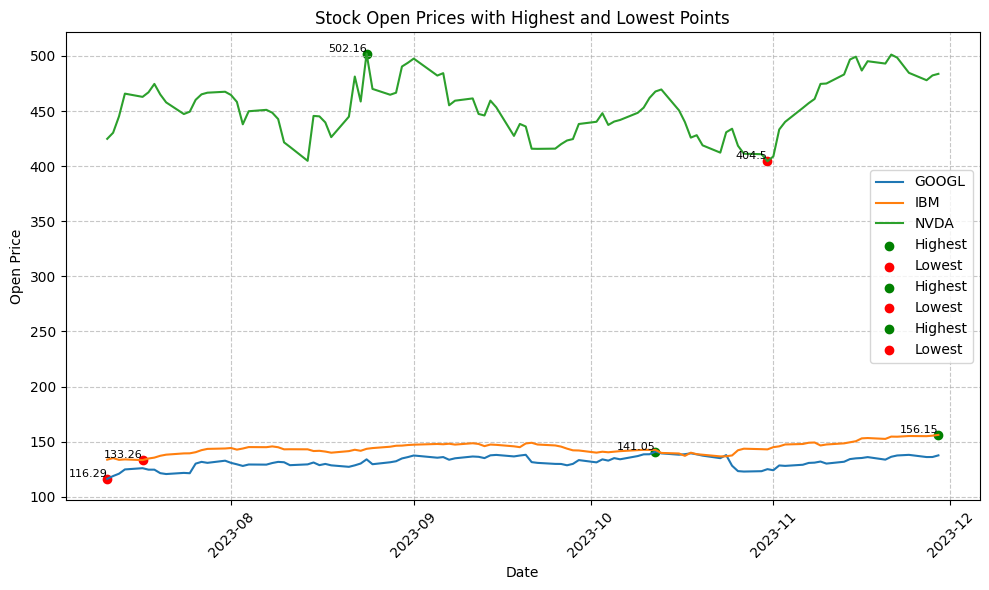

In [30]:
import mysql.connector
import matplotlib.pyplot as plt

# MySQL database connection details
db_config = {
    'host': 'localhost',
    'user': 'root',
    'password': 'Duke#7539',
    'database': 'Project1'
}

# Establish a connection to MySQL
conn = mysql.connector.connect(**db_config)
cursor = conn.cursor()

# Fetching data from the 'newstocks' table
symbols = ['GOOGL', 'IBM', 'NVDA']  # Assuming the symbols are GOOGL for Google, IBM, and NVDA for Nvidia
data = {}

for symbol in symbols:
    query = f"SELECT date, open FROM newstocks WHERE symbol = '{symbol}'"
    cursor.execute(query)
    result = cursor.fetchall()
    data[symbol] = {'date': [], 'open': []}
    for row in result:
        data[symbol]['date'].append(row[0])
        data[symbol]['open'].append(row[1])

# Close the cursor and database connection
cursor.close()
conn.close()

# Plotting the data as a line plot
plt.figure(figsize=(10, 6))

for symbol in symbols:
    plt.plot(data[symbol]['date'], data[symbol]['open'], label=symbol)

# Find and annotate highest and lowest points
for symbol in symbols:
    highest_point = max(data[symbol]['open'])
    lowest_point = min(data[symbol]['open'])
    date_highest = data[symbol]['date'][data[symbol]['open'].index(highest_point)]
    date_lowest = data[symbol]['date'][data[symbol]['open'].index(lowest_point)]
    
    plt.scatter(date_highest, highest_point, marker='o', color='green', label='Highest')
    plt.scatter(date_lowest, lowest_point, marker='o', color='red', label='Lowest')
    
    plt.text(date_highest, highest_point, f'{highest_point}', ha='right', va='bottom', fontsize=8)
    plt.text(date_lowest, lowest_point, f'{lowest_point}', ha='right', va='bottom', fontsize=8)

plt.title('Stock Open Prices with Highest and Lowest Points')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Final Visualization 

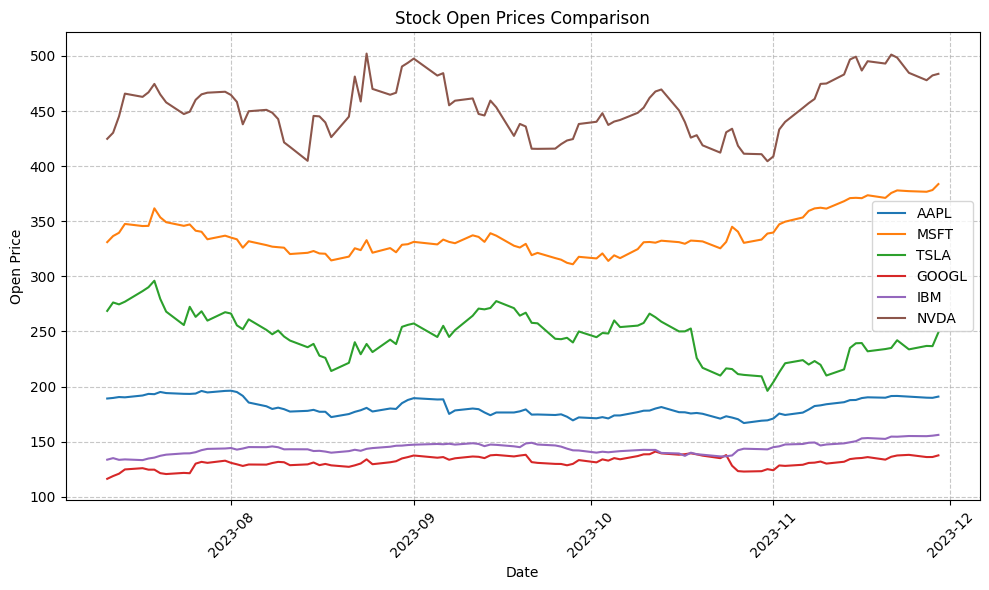

In [31]:
import mysql.connector
import matplotlib.pyplot as plt

# MySQL database connection details for 'stocks' table
db_config_stocks = {
    'host': 'localhost',
    'user': 'root',
    'password': 'Duke#7539',
    'database': 'Project1'
}

# MySQL database connection details for 'newstocks' table
db_config_newstocks = {
    'host': 'localhost',
    'user': 'root',
    'password': 'Duke#7539',
    'database': 'Project1'
}

# Establish connections to MySQL for both tables
conn_stocks = mysql.connector.connect(**db_config_stocks)
conn_newstocks = mysql.connector.connect(**db_config_newstocks)

# Fetching data from the 'stocks' table for Apple, Microsoft, and Tesla
symbols_stocks = ['AAPL', 'MSFT', 'TSLA']
data_stocks = {}

for symbol in symbols_stocks:
    query_stocks = f"SELECT date, open FROM stocks WHERE symbol = '{symbol}'"
    cursor_stocks = conn_stocks.cursor()
    cursor_stocks.execute(query_stocks)
    result_stocks = cursor_stocks.fetchall()
    data_stocks[symbol] = {'date': [], 'open': []}
    for row in result_stocks:
        data_stocks[symbol]['date'].append(row[0])
        data_stocks[symbol]['open'].append(row[1])
    cursor_stocks.close()

# Fetching data from the 'newstocks' table for Google, IBM, and Nvidia
symbols_newstocks = ['GOOGL', 'IBM', 'NVDA']
data_newstocks = {}

for symbol in symbols_newstocks:
    query_newstocks = f"SELECT date, open FROM newstocks WHERE symbol = '{symbol}'"
    cursor_newstocks = conn_newstocks.cursor()
    cursor_newstocks.execute(query_newstocks)
    result_newstocks = cursor_newstocks.fetchall()
    data_newstocks[symbol] = {'date': [], 'open': []}
    for row in result_newstocks:
        data_newstocks[symbol]['date'].append(row[0])
        data_newstocks[symbol]['open'].append(row[1])
    cursor_newstocks.close()

# Close connections to databases
conn_stocks.close()
conn_newstocks.close()

# Plotting the data as a line plot
plt.figure(figsize=(10, 6))

for symbol in data_stocks:
    plt.plot(data_stocks[symbol]['date'], data_stocks[symbol]['open'], label=symbol)

for symbol in data_newstocks:
    plt.plot(data_newstocks[symbol]['date'], data_newstocks[symbol]['open'], label=symbol)

plt.title('Stock Open Prices Comparison')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


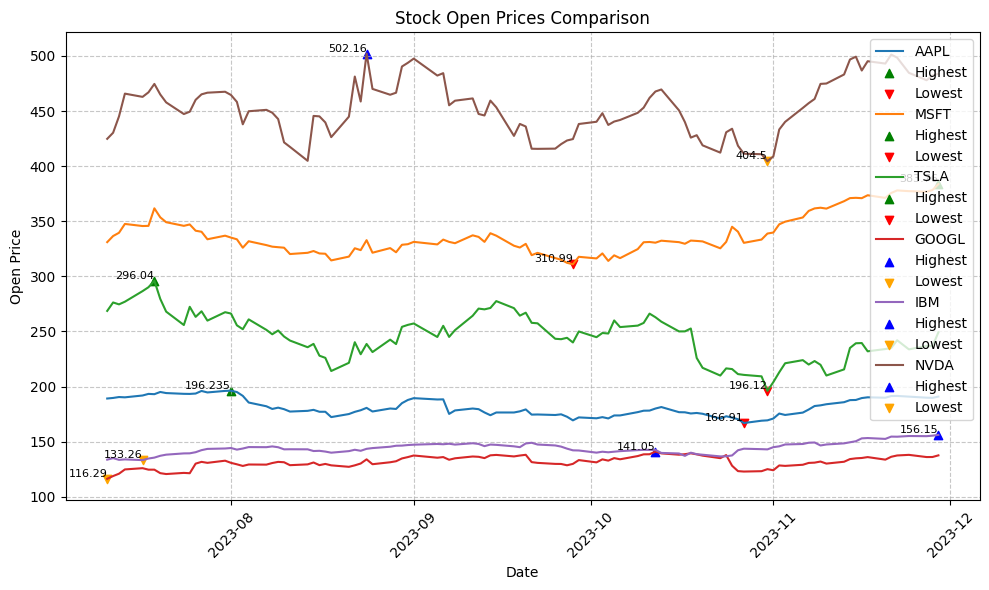

In [32]:
import mysql.connector
import matplotlib.pyplot as plt

# MySQL database connection details for 'stocks' table
db_config_stocks = {
    'host': 'localhost',
    'user': 'root',
    'password': 'Duke#7539',
    'database': 'Project1'
}

# MySQL database connection details for 'newstocks' table
db_config_newstocks = {
    'host': 'localhost',
    'user': 'root',
    'password': 'Duke#7539',
    'database': 'Project1'
}

# Establish connections to MySQL for both tables
conn_stocks = mysql.connector.connect(**db_config_stocks)
conn_newstocks = mysql.connector.connect(**db_config_newstocks)

# Fetching data from the 'stocks' table for Apple, Microsoft, and Tesla
symbols_stocks = ['AAPL', 'MSFT', 'TSLA']
data_stocks = {}

for symbol in symbols_stocks:
    query_stocks = f"SELECT date, open FROM stocks WHERE symbol = '{symbol}'"
    cursor_stocks = conn_stocks.cursor()
    cursor_stocks.execute(query_stocks)
    result_stocks = cursor_stocks.fetchall()
    data_stocks[symbol] = {'date': [], 'open': []}
    for row in result_stocks:
        data_stocks[symbol]['date'].append(row[0])
        data_stocks[symbol]['open'].append(row[1])
    cursor_stocks.close()

# Fetching data from the 'newstocks' table for Google, IBM, and Nvidia
symbols_newstocks = ['GOOGL', 'IBM', 'NVDA']
data_newstocks = {}

for symbol in symbols_newstocks:
    query_newstocks = f"SELECT date, open FROM newstocks WHERE symbol = '{symbol}'"
    cursor_newstocks = conn_newstocks.cursor()
    cursor_newstocks.execute(query_newstocks)
    result_newstocks = cursor_newstocks.fetchall()
    data_newstocks[symbol] = {'date': [], 'open': []}
    for row in result_newstocks:
        data_newstocks[symbol]['date'].append(row[0])
        data_newstocks[symbol]['open'].append(row[1])
    cursor_newstocks.close()

# Close connections to databases
conn_stocks.close()
conn_newstocks.close()

# Plotting the data as a line plot
plt.figure(figsize=(10, 6))

for symbol in data_stocks:
    plt.plot(data_stocks[symbol]['date'], data_stocks[symbol]['open'], label=symbol)
    # Find and annotate highest and lowest points for stocks from 'stocks' table
    highest_point_stocks = max(data_stocks[symbol]['open'])
    lowest_point_stocks = min(data_stocks[symbol]['open'])
    date_highest_stocks = data_stocks[symbol]['date'][data_stocks[symbol]['open'].index(highest_point_stocks)]
    date_lowest_stocks = data_stocks[symbol]['date'][data_stocks[symbol]['open'].index(lowest_point_stocks)]
    
    plt.scatter(date_highest_stocks, highest_point_stocks, marker='^', color='green', label='Highest')
    plt.scatter(date_lowest_stocks, lowest_point_stocks, marker='v', color='red', label='Lowest')
    
    plt.text(date_highest_stocks, highest_point_stocks, f'{highest_point_stocks}', ha='right', va='bottom', fontsize=8)
    plt.text(date_lowest_stocks, lowest_point_stocks, f'{lowest_point_stocks}', ha='right', va='bottom', fontsize=8)

for symbol in data_newstocks:
    plt.plot(data_newstocks[symbol]['date'], data_newstocks[symbol]['open'], label=symbol)
    # Find and annotate highest and lowest points for stocks from 'newstocks' table
    highest_point_newstocks = max(data_newstocks[symbol]['open'])
    lowest_point_newstocks = min(data_newstocks[symbol]['open'])
    date_highest_newstocks = data_newstocks[symbol]['date'][data_newstocks[symbol]['open'].index(highest_point_newstocks)]
    date_lowest_newstocks = data_newstocks[symbol]['date'][data_newstocks[symbol]['open'].index(lowest_point_newstocks)]
    
    plt.scatter(date_highest_newstocks, highest_point_newstocks, marker='^', color='blue', label='Highest')
    plt.scatter(date_lowest_newstocks, lowest_point_newstocks, marker='v', color='orange', label='Lowest')
    
    plt.text(date_highest_newstocks, highest_point_newstocks, f'{highest_point_newstocks}', ha='right', va='bottom', fontsize=8)
    plt.text(date_lowest_newstocks, lowest_point_newstocks, f'{lowest_point_newstocks}', ha='right', va='bottom', fontsize=8)

plt.title('Stock Open Prices Comparison')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
